In [13]:
#jupyter notebook magic
%store -r habitat_data_dir teton_gdf rmnp_gdf aoi_gdf

## Data Download for Elevation 

This data is from earth access 

In [41]:
# import required libraries 
import os
import pathlib
from glob import glob

import earthaccess
import xrspatial
import rioxarray as rxr

In [15]:
# Set required data directories 
elev_data_dir = os.path.join(habitat_data_dir,'elevation')
os.makedirs(elev_data_dir, exist_ok=True)


In [16]:
#login to earth access
earthaccess.login()

array([-110.94841749,   40.15806685, -105.49358345,   44.08400609])

In [17]:
#search earth access data sets 
datasets = earthaccess.search_datasets(keyword='SRTM DEM')
for dataset in datasets:
    print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])
    

NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002
GFSAD30EUCEARUMECE Global Food Security-support Analysis Data (GFSAD) Cropland Extent 2015 Europe, Central Asia, Russia, Middle East product 30 m V001
GFSAD30SA

In [42]:
# do a data search over gdf bounds and download data 
strm_pattern = os.path.join(elev_data_dir, '*.hgt.zip')
if not glob(strm_pattern):
    for _, row in aoi_gdf.iterrows():
        bounds = tuple(row.geometry.bounds)
        strm_results = earthaccess.search_data(
            short_name = 'SRTMGL1',
            bounding_box=bounds
        )

earthaccess.download(strm_results, elev_data_dir)



QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['C:\\Users\\Nolan Welsh\\earth-analytics\\data\\habitat-project-directory-Nolan-Welsh\\elevation\\N40W106.SRTMGL1.hgt.zip']

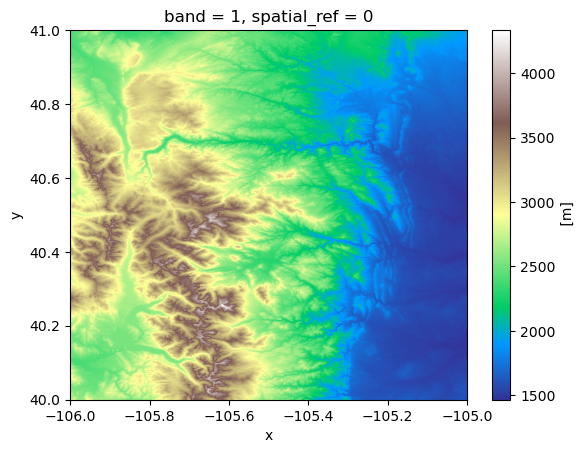

In [45]:
#plot data download 
for strm_path in glob(strm_pattern):
    strm_da = rxr.open_rasterio(strm_path, mask_and_scale=True).squeeze()
    strm_da.plot(cmap='terrain')
    